1) Email Spam — Logistic Regression (binary)
Task: Fit is_spam ~ features with LogisticRegression (scaled). Report accuracy, precision, recall, F1, ROC-AUC, and a confusion matrix.
Columns: word_free, word_offer, word_click, num_links, num_caps, sender_reputation, is_spam


Model Performance:
Accuracy     : 0.3000
Precision    : 0.1818
Recall       : 0.0952
F1 Score     : 0.1250
ROC-AUC      : 0.2055

Confusion Matrix: [[10  9]
 [19  2]]


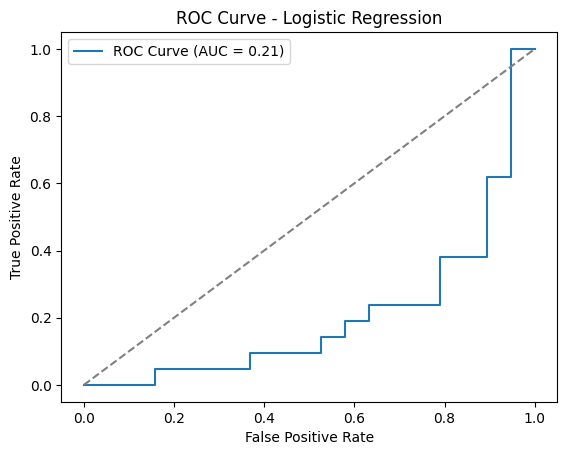

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)


df=pd.read_csv("C:/Users/varsh/Downloads/email_spam.csv")
df.columns


X=df[['word_free','word_offer','word_click','num_links','num_caps','sender_reputation']]
y=df['is_spam']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)   #split test and train

scaler=StandardScaler()                            #standardization
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=LogisticRegression()                #regression
model.fit(X_train_scaled, y_train)

y_pred=model.predict(X_test_scaled)        #predictions
y_prob=model.predict_proba(X_test_scaled)[:,1]


accuracy = accuracy_score(y_test, y_pred)              # 7. Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC-AUC      : {roc_auc:.4f}")
print("\nConfusion Matrix:",cm)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)     # 9. ROC Curve Plot        False Positive Rate,true positive rate ,threshold value
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

2) Customer Churn — Logistic Regression (binary)
Task: Fit churn ~ tenure_months + monthly_charges + support_tickets + is_premium + avg_usage_hours (scaled). Report metrics as above.


Model Performance:
Accuracy     : 0.6000
Precision    : 0.6522
Recall       : 0.6522
F1 Score     : 0.6522
ROC-AUC      : 0.6419

Confusion Matrix: [[ 9  8]
 [ 8 15]]


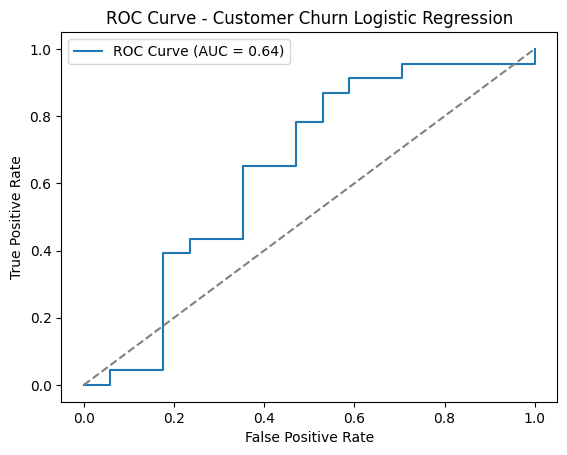

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt

df=pd.read_csv("C:/Users/varsh/Downloads/customer_churn.csv")

X = df[['tenure_months', 'monthly_charges', 'support_tickets', 'is_premium', 'avg_usage_hours']]
y = df['churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred=model.predict(X_test_scaled)
y_prob=model.predict_proba(X_test_scaled)[:, 1]

accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_prob)
cm=confusion_matrix(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC-AUC      : {roc_auc:.4f}")
print("\nConfusion Matrix:",cm)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], '--', color='gray')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Customer Churn Logistic Regression")
plt.legend()
plt.show()


3) Disease Stage — Multiclass Logistic Regression
Task: Fit multinomial logistic for stage ∈ {0,1,2} using age, b1..b4. Report accuracy, macro-F1, weighted-F1 and confusion matrix.


Model Performance:
Accuracy      : 0.2500
Macro F1      : 0.2316
Weighted F1   : 0.2556

Confusion Matrix: [[7 6 3]
 [3 1 7]
 [5 6 2]]


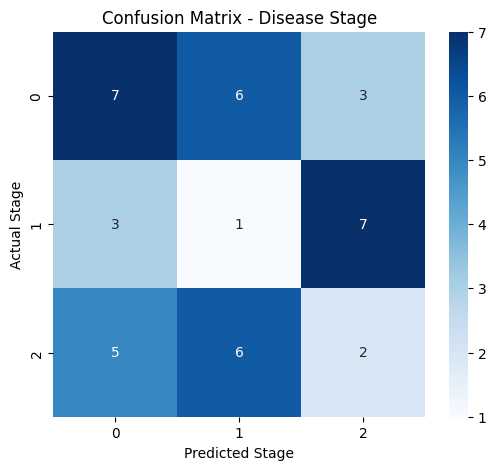


Classification Report:               precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.08      0.09      0.08        11
           2       0.17      0.15      0.16        13

    accuracy                           0.25        40
   macro avg       0.24      0.23      0.23        40
weighted avg       0.26      0.25      0.26        40



In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv("C:/Users/varsh/Downloads/disease_stage.csv")

X=df[['age','b1','b2','b3','b4']]
y=df['stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500) #solver='lbfgs' → optimization algorithm suitable for multinomial loss.
#max_iter=500 → maximum iterations to converge.
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy=accuracy_score(y_test, y_pred)
macro_f1=f1_score(y_test, y_pred, average='macro')
weighted_f1=f1_score(y_test, y_pred, average='weighted')
cm=confusion_matrix(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy      : {accuracy:.4f}")
print(f"Macro F1      : {macro_f1:.4f}")
print(f"Weighted F1   : {weighted_f1:.4f}")
print("\nConfusion Matrix:",cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
#annot=True → shows numbers on the squares.,fmt='d' → integer formatting.
plt.xlabel("Predicted Stage")
plt.ylabel("Actual Stage")
plt.title("Confusion Matrix - Disease Stage")
plt.show()


print("\nClassification Report:",classification_report(y_test, y_pred))


4) Flowers — k-NN Classification with CV
Task: Fit k-NN on sepal_length, sepal_width, petal_length, petal_width. Use 5-fold CV to choose k ∈ {1,3,…,25}. Report best k, CV score, test accuracy, and confusion matrix.


Best k: 13
Best 5-fold CV score: 0.4000
Test Accuracy: 0.2250
Confusion Matrix:
 [[5 6 7]
 [6 2 4]
 [3 5 2]]


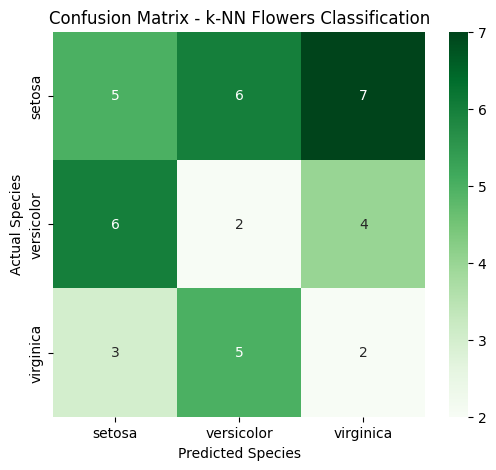

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:/Users/varsh/Downloads/flowers.csv")  # <-- your path here

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

k_values=list(range(1, 26, 2))  # odd k from 1 to 25
cv_scores=[]

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train_scaled, y_train, cv=5)  # 5-fold CV
    cv_scores.append(scores.mean())

best_k=k_values[cv_scores.index(max(cv_scores))]
print(f"Best k: {best_k}")
print(f"Best 5-fold CV score: {max(cv_scores):.4f}")

best_knn=KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

y_pred=best_knn.predict(X_test_scaled)
test_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.title("Confusion Matrix - k-NN Flowers Classification")
plt.show()


5) Airbnb Prices — k-NN Regression with CV
Task: Fit k-NN regressor on size_m2, distance_center_km, rating, num_reviews. Use 5-fold CV to pick k ∈ {1,3,…,25} (scaling required). Report CV RMSE, test RMSE, and test R².


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

df=pd.read_csv("C:/Users/varsh/Downloads/airbnb.csv")

X=df[['size_m2', 'distance_center_km', 'rating', 'num_reviews']]
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

k_values=list(range(1,26,2))
cv_rmse=[]

for k in k_values:
    knn=KNeighborsRegressor(n_neighbors=k)
    scores=-cross_val_score(knn,X_train_scaled,y_train,cv=5,scoring="neg_root_mean_squared_error")
    cv_rmse.append(scores.mean())


bestk=k_values[cv_rmse.index(min(cv_rmse))]
print(f"Best_k : {bestk}")
print(f"best cv rmse : {min(cv_rmse):.4f}")

bestknn=KNeighborsRegressor(n_neighbors=bestk)
bestknn.fit(X_train_scaled,y_train)

y_pred=bestknn.predict(X_test_scaled)
testrmse=np.sqrt(mean_squared_error(y_test,y_pred))
testr2=r2_score(y_test,y_pred)

print(f"test rmse:{testrmse:.4f}")
print(f"test r2 :{testr2:.4f}")

Best_k : 25
best cv rmse : 143.6022
test rmse:113.1389
test r2 :-0.1616
